<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-10-24 20:16:09
-------------------
qualified stocks: 88
with latest results: 28
still star stocks: 17
-------------------
Initial Investment:  1.23 C
CY Investment:  1.50 C
Reserve:  54.95 K
Current:  1.42 C
-------------------
Today PnL: -11.88 K (-0.08%)
Current PnL: -19.63 L (-13.08%)
CY Booked + Current PnL: -7.53 L (-5.02%)
-------------------
Total profit:  2.24 L
Total loss:  -21.87 L
-------------------
Total Booked + Current PnL: 19.45 L (15.8%)
Total Booked PnL: 39.08 L (31.74%)
Curr Year Booked PnL: 12.10 L (8.52%)
Prev Year Booked PnL: 26.98 L (21.91%)
Est FTT:  2.29 C
Est FTT PnL: 86.81 L (61.12%)
Deployed:  1.23 C
Current:  1.42 C
CAGR/XIRR %: 8.41%
Row successfully appended and saved to data/myPortfolioDB.csv.


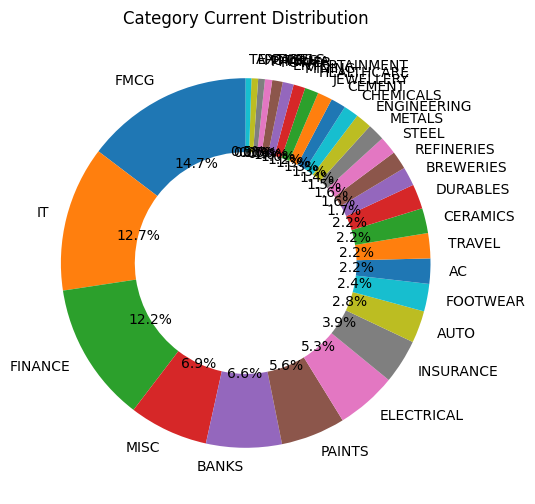

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
58,RELIANCE,1348.50,1533.00,-9.43,3.18,X-LC,66.0,226450.0,16084.0,12704.0,...,7.65,5.61,13.68,37.0,1.27,1.60,25.43,XY25,REFINERIES,NTT
85,VOLTAS,1278.28,1530.00,3.12,2.80,X-MC,60.0,216210.0,24468.0,13297.0,...,12.76,6.15,19.69,99.0,1.84,1.53,20.43,XY25,AC,NTT
2,ABBOTINDIA,30226.00,35195.00,-11.28,3.32,X-MC,44.0,89790.0,-888.0,15794.0,...,-0.98,17.59,16.44,101.0,-0.06,0.63,19.00,X40,PHARMA,ATH
78,TTKPRESTIG,769.29,770.00,96.16,1.97,M-SC,49.0,84482.0,-16295.0,16390.0,...,-16.17,19.40,0.09,245.0,-0.99,0.60,10.99,OX40N,DURABLES,NTT
42,ITC,409.28,452.00,-37.16,1.95,X-LC,64.0,203815.0,3677.0,17222.0,...,1.84,8.45,10.44,4.0,0.21,1.44,7.50,X40,FMCG,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,AWL,315.97,485.00,-64.42,1.47,X-SC,50.0,251404.0,-50347.0,211783.0,...,-16.69,84.24,53.50,116.0,-0.24,1.78,11.66,XY24,FMCG,NTT
74,TATAMOTORS,761.77,1065.00,-53.04,13.41,X-LC,16.0,147324.0,-129199.0,239269.0,...,-46.72,162.41,39.81,54.0,-0.54,1.04,3.84,XY24,AUTO,NTT
59,REPCOHOME,463.60,880.00,-55.29,2.98,H-SC,72.0,258324.0,-28181.0,285526.0,...,-9.84,110.53,89.82,134.0,-0.10,1.83,36.67,XY24,FINANCE,NTT
11,BANDHANBNK,207.88,400.00,-8.72,2.45,H-SC,58.0,227800.0,-50759.0,308191.0,...,-18.22,135.29,92.42,151.0,-0.16,1.61,31.65,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-40.43,6.32,H-LC,47.0,248688.0,-12931.0,132153.0,...,-4.94,53.14,45.57,7.0,-0.10,1.76,5.82,AR,ELECTRICAL,NTT
2,ABBOTINDIA,30226.00,35195.00,-11.28,3.32,X-MC,44.0,89790.0,-888.0,15794.0,...,-0.98,17.59,16.44,101.0,-0.06,0.63,19.00,X40,PHARMA,ATH
3,ACC,2379.51,3906.00,-37.64,2.90,X-MC,50.0,185010.0,-52941.0,205583.0,...,-22.25,111.12,64.15,174.0,-0.26,1.31,3.78,XY24,CEMENT,BTT
5,ANGELONE,2329.34,3033.00,16.27,6.37,X-SC,71.0,206189.0,15183.0,42516.0,...,7.95,20.62,30.21,157.0,0.36,1.46,30.49,X40N,FINANCE,NTT
6,ASIANPAINT,2861.00,3465.66,-12.71,5.17,X-LC,63.0,220141.0,-31627.0,84842.0,...,-12.56,38.54,21.13,27.0,-0.37,1.56,18.41,X40,PAINTS,ATH
9,AWL,315.97,485.00,-64.42,1.47,X-SC,50.0,251404.0,-50347.0,211783.0,...,-16.69,84.24,53.50,116.0,-0.24,1.78,11.66,XY24,FMCG,NTT
10,BAJAJHFL,122.26,181.50,-14.23,5.75,X-MC,47.0,180744.0,-19762.0,116923.0,...,-9.86,64.69,48.45,90.0,-0.17,1.28,4.23,X40N,FINANCE,ATH
12,BANKINDIA,116.91,190.00,-20.40,14.25,H-MC,68.0,205938.0,26130.0,86288.0,...,14.53,41.90,62.52,88.0,0.30,1.46,53.57,XR,BANKS,NTT
13,BATAINDIA,1550.24,2096.00,2.73,4.44,X-SC,47.0,96703.0,-31967.0,77266.0,...,-24.84,79.90,35.20,219.0,-0.41,0.68,10.99,X40,FOOTWEAR,NTT
14,BERGEPAINT,561.33,680.00,-17.65,1.25,X-MC,57.0,220988.0,-6351.0,54407.0,...,-2.79,24.62,21.14,106.0,-0.12,1.56,24.56,XY24,PAINTS,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,91.11,12.17,H-SC,24.0,129958.0,-88538.0,116728.0,...,-40.52,89.82,12.90,153.0,-0.76,0.92,0.00,OX40N,FINANCE,NTT
18,CERA,7647.97,9475.0,-23.39,2.62,H-SC,45.0,139656.0,-36247.0,78263.0,...,-20.61,56.04,23.89,149.0,-0.46,0.99,20.61,OX40N,CERAMICS,NTT
38,INDIGOPNTS,1407.73,1408.0,95.31,4.60,M-SC,37.0,128042.0,-46517.0,46543.0,...,-26.65,36.35,0.02,221.0,-1.00,0.90,11.37,OX40N,PAINTS,NTT
43,JCHAC,2282.24,2282.0,19573.91,1.57,M-SC,41.0,96096.0,-31709.0,31692.0,...,-24.81,32.98,-0.01,232.0,-1.00,0.68,8.81,OX40N,AC,NTT
45,KANSAINER,299.63,340.0,-66.81,2.38,H-SC,59.0,228573.0,-41094.0,77418.0,...,-15.24,33.87,13.47,138.0,-0.53,1.62,16.22,XY24,PAINTS,NTT
54,RAJESHEXPO,517.65,518.0,1651.26,3.80,L-SC,44.0,47777.0,-89400.0,89491.0,...,-65.17,187.31,0.07,267.0,-1.00,0.34,18.82,OX40N,JEWELLERY,NTT
64,SFL,1016.35,1287.0,31.80,7.11,M-SC,47.0,173956.0,-88262.0,158091.0,...,-33.66,90.88,26.63,229.0,-0.56,1.23,8.16,XY24,MISC,NTT
67,SIS,435.42,528.0,2069.95,3.25,H-SC,52.0,87567.0,-23465.0,47076.0,...,-21.13,53.76,21.26,156.0,-0.50,0.62,18.31,OX40N,MISC,NTT
71,SYMPHONY,1306.42,1306.0,-44.37,18.55,M-SC,46.0,118385.0,-52756.0,52705.0,...,-30.83,44.52,-0.03,196.0,-1.00,0.84,3.21,OX40N,DURABLES,NTT
73,TATAELXSI,6938.68,9161.0,-22.20,7.48,H-MC,55.0,105336.0,-26499.0,68721.0,...,-20.10,65.24,32.03,98.0,-0.39,0.74,17.99,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
3,ACC,2379.51,3906.00,-37.64,2.90,X-MC,50.0,185010.0,-52941.0,205583.0,...,-22.25,111.12,64.15,174.0,-0.26,1.31,3.78,XY24,CEMENT,BTT
8,ATULAUTO,579.80,844.00,3608.11,3.14,M-SC,48.0,166498.0,-30634.0,120461.0,...,-15.54,72.35,45.57,236.0,-0.25,1.18,18.04,XY24,AUTO,NTT
9,AWL,315.97,485.00,-64.42,1.47,X-SC,50.0,251404.0,-50347.0,211783.0,...,-16.69,84.24,53.50,116.0,-0.24,1.78,11.66,XY24,FMCG,NTT
11,BANDHANBNK,207.88,400.00,-8.72,2.45,H-SC,58.0,227800.0,-50759.0,308191.0,...,-18.22,135.29,92.42,151.0,-0.16,1.61,31.65,XY24,BANKS,NTT
14,BERGEPAINT,561.33,680.00,-17.65,1.25,X-MC,57.0,220988.0,-6351.0,54407.0,...,-2.79,24.62,21.14,106.0,-0.12,1.56,24.56,XY24,PAINTS,NTT
16,CAMPUS,294.86,393.00,-22.96,3.22,M-SC,57.0,160486.0,-7289.0,63135.0,...,-4.34,39.34,33.28,210.0,-0.12,1.13,24.39,XY24,FOOTWEAR,NTT
19,COALINDIA,406.65,497.97,8.79,2.65,L-LC,62.0,145798.0,-4662.0,38447.0,...,-3.10,26.37,22.46,167.0,-0.12,1.03,14.42,XY25,MINING,ATH
21,COLPAL,2633.65,3767.14,-4.00,8.14,X-MC,46.0,223940.0,-39425.0,152772.0,...,-14.97,68.22,43.04,84.0,-0.26,1.58,3.96,XY25,FMCG,ATH
22,DABUR,511.48,735.00,-8.81,3.86,X-MC,53.0,246598.0,-1470.0,109884.0,...,-0.59,44.56,43.70,102.0,-0.01,1.74,13.77,XY24,FMCG,BTT
25,EASEMYTRIP,18.12,26.40,-18.55,26.93,M-SC,42.0,78357.0,-98458.0,179257.0,...,-55.68,228.77,45.70,197.0,-0.55,0.55,2.29,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-40.43,6.32,H-LC,47.0,248688.0,-12931.0,132153.0,...,-4.94,53.14,45.57,7.0,-0.10,1.76,5.82,AR,ELECTRICAL,NTT
4,ALKYLAMINE,2347.98,4546.37,-14.57,5.54,H-SC,38.0,80466.0,-20497.0,115026.0,...,-20.30,142.95,93.63,148.0,-0.18,0.57,19.85,SR,CHEMICALS,ATH
7,ASIANTILES,75.41,137.00,7050.00,7.18,L-SC,62.0,78459.0,-15351.0,91970.0,...,-16.36,117.22,81.67,269.0,-0.17,0.55,51.94,XR,CERAMICS,NTT
12,BANKINDIA,116.91,190.00,-20.40,14.25,H-MC,68.0,205938.0,26130.0,86288.0,...,14.53,41.90,62.52,88.0,0.30,1.46,53.57,XR,BANKS,NTT
15,BSOFT,551.58,836.99,-13.63,14.83,H-SC,64.0,97270.0,-43383.0,116160.0,...,-30.84,119.42,51.74,131.0,-0.37,0.69,12.54,XR,IT,ATH
20,COFFEEDAY,59.14,80.00,-43.66,27.02,L-SC,53.0,82925.0,-30624.0,70677.0,...,-26.97,85.23,35.27,268.0,-0.43,0.59,102.96,XR,HOTELS,NTT
23,DEN,52.79,75.00,89.12,6.27,M-SC,41.0,53328.0,-31136.0,66671.0,...,-36.86,125.02,42.07,237.0,-0.47,0.38,13.25,AR,ENTERTAINMENT,NTT
27,HAPPSTMNDS,801.03,1488.71,-22.82,16.82,H-SC,48.0,83152.0,-45013.0,155045.0,...,-35.12,186.46,85.85,132.0,-0.29,0.59,6.15,AR,IT,ATH
28,HATHWAY,18.12,31.40,860.14,7.23,H-SC,42.0,82620.0,-26100.0,105778.0,...,-24.01,128.03,73.29,161.0,-0.25,0.58,10.51,XR,ENTERTAINMENT,NTT
36,IEX,147.35,219.00,-30.16,17.42,H-SC,62.0,199547.0,-407.0,97638.0,...,-0.20,48.93,48.63,115.0,-0.00,1.41,11.33,XR,MISC,NTT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.43
1,20,36.00
2,30,51.12


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,46.32
LC,31.03
MC,22.68


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,30.29
X40,16.01
XY25,12.29
XR,11.32
X40N,9.32
AR,7.91
OX40N,7.62
X200,1.76
X5K,1.50


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,25.68
X-LC,20.22
X-MC,16.95
M-SC,12.74
X-SC,6.42
M-LC,5.15
H-LC,4.63
H-MC,3.85
M-MC,1.58


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

,,CurrAlloc%
Criteria,Conviction,
XY24,H-SC,9.95
X40,X-LC,9.03
XY24,M-SC,6.32
X40,X-MC,6.30
XR,H-SC,6.13
XY25,X-LC,5.50
XY24,X-MC,4.61
AR,H-SC,4.07
X40N,X-SC,3.60


In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,14.67,-3.80,37.67
IT,12.72,-16.86,79.86
FINANCE,12.25,-9.23,58.74
MISC,6.93,-17.35,82.37
BANKS,6.61,-6.71,62.84
PAINTS,5.64,-15.74,32.99
ELECTRICAL,5.30,-9.85,48.39
INSURANCE,3.88,-0.72,38.27
AUTO,2.81,-44.57,104.91


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,72.54,10259687.0,-9.58,-982969.0,52.72,5409220.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,56.16,7945833.0,-5.82,-462692.0,43.23,3435067.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3291125.0
XR,1307407.0
AR,1176192.0
X40,780068.0
X40N,611032.0
OX40N,569155.0
XY25,444352.0
SR,267798.0
X5K,105921.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3369918.0
M-SC,1205133.0
X-LC,995814.0
X-MC,956009.0
X-SC,736137.0
H-MC,335673.0
H-LC,282643.0
M-LC,280169.0
L-SC,252138.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1166959.0
AR        H-SC           844016.0
XR        H-SC           773769.0
XY24      M-SC           694384.0
X40       X-LC           448945.0
XY24      X-SC           376451.0
          X-MC           369874.0
          X-LC           308969.0
X40N      X-SC           282420.0
SR        H-SC           267798.0
OX40N     H-SC           263613.0
X40       X-MC           253857.0
AR        H-LC           208121.0
XY24      H-MC           180664.0
          M-MC           169694.0
X40N      X-MC           166209.0
XY25      X-MC           166069.0
XR        L-SC           162647.0
X40N      X-LC           162403.0
OX40N     M-SC           147330.0
AR        M-SC           124055.0
XY25      M-SC           123968.0
XR        M-SC           115396.0
          M-LC           109747.0
X5K       M-LC           105921.0
OX40N     L-SC            89491.0
XR        H-MC            86288.0
X40       X-SC            77266.0
XY25      X-LC            75497.0
X200      H-LC            74522.0
OX40N     H-MC            68721.0
XR        L-MC            59560.0
MH        H-SC            53763.0
XY25      M-LC            40371.0
          L-LC            38447.0
XY24      M-LC            24130.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,25
M-SC,15
X-MC,13
X-LC,12
X-SC,7
M-LC,4
H-LC,3
L-SC,3
H-MC,3
